In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

#Part1:

##Code:

In [3]:
# Load Tesla stock data
tesla_data = pd.read_csv('tesla.csv', date_parser=True)

<ipython-input-3-60374c39f210>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  tesla_data = pd.read_csv('tesla.csv', date_parser=True)


In [4]:
#Check for null and 0 values
tesla_data.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [5]:
tesla_data['Close'].isin([0]).sum()

np.int64(0)

In [6]:
#Using min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tesla_data['Close'].values.reshape(-1, 1))

scaled_data.shape

(2956, 1)

In [7]:
# %70 of data for train other for test
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

train_data.shape

(2069, 1)

In [8]:
# create time-windows for dataset
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)


In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))  # Output layer with 1 unit
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 3.3120e-04
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.6439e-06
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 4.4007e-06
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 4.5768e-06
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 4.1535e-06
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 3.9068e-06
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 4.1226e-06
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 3.8623e-06
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 3.5560e-06
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 4.2823e-06
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 4.0144e-06
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 4.5284e-06
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 3.6676e-06
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 3.9021e-06
E

In [12]:
#Test data predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

#Train data predictions
train_predict = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [13]:
train_mse = mean_squared_error(y_train_actual, train_predictions)
print(f'Train Mean Squared Error: {train_mse}')
train_rmse = np.sqrt(train_mse)
print(f'Train Root Mean Squared Error (RMSE): {train_rmse}')

test_mse = mean_squared_error(y_test_actual, predictions)
print(f'Test Mean Squared Error: {test_mse}')
test_rmse = np.sqrt(test_mse)
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')

Train Mean Squared Error: 4.155219336487765
Train Root Mean Squared Error (RMSE): 2.0384355119767132
Test Mean Squared Error: 1911.925715904182
Test Root Mean Squared Error (RMSE): 43.72557279103594


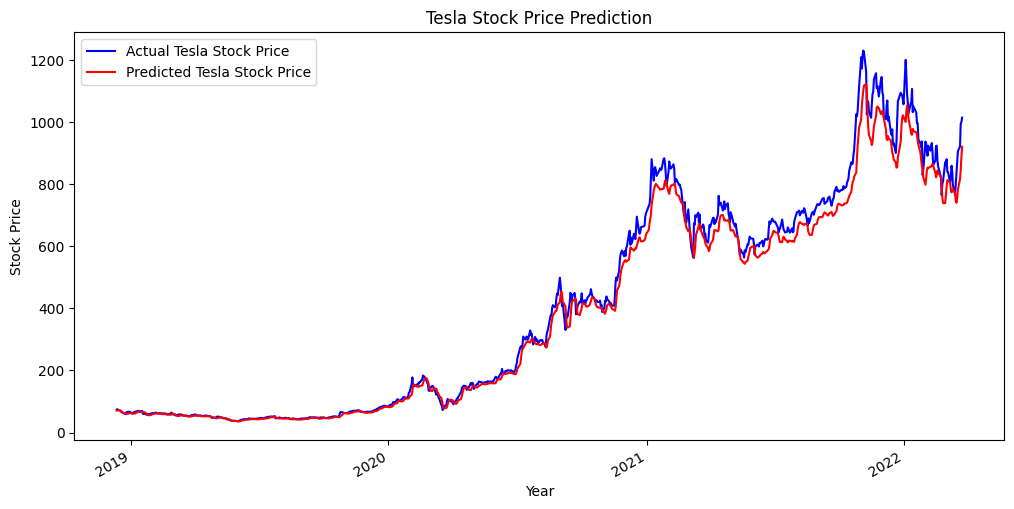

In [14]:
# Assuming `data` contains the Date column in the correct format:
# Convert the 'Date' column to datetime if it isn't already
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Plot the actual and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Tesla Stock Price')
plt.plot(tesla_data['Date'][-len(predictions):], predictions, color='red', label='Predicted Tesla Stock Price')

# Format the x-axis to display years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set the x-axis to show major ticks for each year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the ticks as years

# Rotate the x-axis labels for better visibility
plt.gcf().autofmt_xdate()

plt.title('Tesla Stock Price Prediction')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [15]:
# Load Gold price data
gold_data = pd.read_csv('gold.csv', date_parser=True)
tesla_data = pd.read_csv('tesla.csv', date_parser=True)


<ipython-input-15-8a4224c3da20>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  gold_data = pd.read_csv('gold.csv', date_parser=True)
<ipython-input-15-8a4224c3da20>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  tesla_data = pd.read_csv('tesla.csv', date_parser=True)


In [16]:
gold_data.isna().sum()

,0
Date,1
Close,0
High,0
Low,0
Open,0
Volume,0


In [17]:
gold_data.dropna(inplace=True)

In [18]:
gold_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [19]:
gold_data.isin([0]).sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [20]:
# Merge both datasets on the 'Date' column
data = pd.merge(tesla_data[['Date', 'Close']], gold_data[['Date', 'Close']], on='Date', suffixes=('_tesla', '_gold'))
data.tail()

,Date,Close_tesla,Close_gold
2947,2022-03-17,871.599976,1942.0999755859375
2948,2022-03-18,905.390015,1928.199951171875
2949,2022-03-21,921.159973,1928.5999755859375
2950,2022-03-22,993.979980,1920.699951171875
2951,2022-03-23,999.109985,1936.5999755859375


In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_tesla = scaler.fit_transform(data['Close_tesla'].values.reshape(-1, 1))
scaled_data_gold = scaler.fit_transform(data['Close_gold'].values.reshape(-1, 1))

# Combine the scaled data into a single dataset
scaled_data = np.hstack((scaled_data_tesla, scaled_data_gold))


In [22]:
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, :])  # Include both features (Tesla and Gold prices)
        y.append(data[i, 0])  # Predict Tesla stock price
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)


In [23]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 2)  # 2 features: Tesla and Gold prices
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)  # 2 features


In [24]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))  # Output layer with 1 unit
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0015
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.2179e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.7793e-05
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 1.8385e-05
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.5054e-06
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.6567e-06
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.7745e-06
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 9.1098e-06
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 8.4019e-06
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.1041e-06
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 6.3562e-06
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 9.5715e-06
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.5211e-06
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6.5779e-06
Epoch

In [26]:
#Test data predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

#Train data predictions
train_predict = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [27]:
train_mse = mean_squared_error(y_train_actual, train_predictions)
print(f'Train Mean Squared Error: {train_mse}')
train_rmse = np.sqrt(train_mse)
print(f'Train Root Mean Squared Error (RMSE): {train_rmse}')

test_mse = mean_squared_error(y_test_actual, predictions)
print(f'Test Mean Squared Error: {test_mse}')
test_rmse = np.sqrt(test_mse)
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')

Train Mean Squared Error: 2.716558233544598
Train Root Mean Squared Error (RMSE): 1.6481984812347685
Test Mean Squared Error: 3810.225014810185
Test Root Mean Squared Error (RMSE): 61.72702013551427


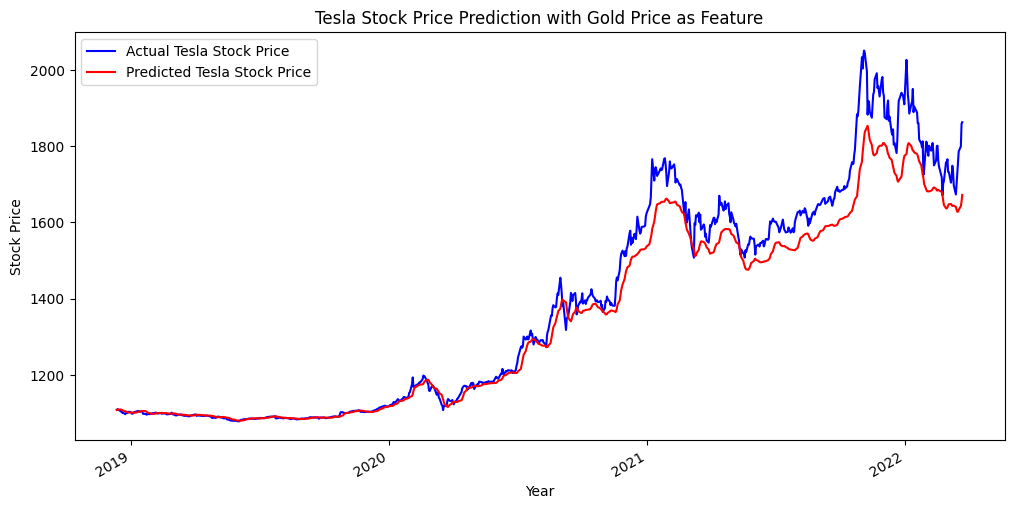

In [28]:

# Assuming `data` contains the Date column in the correct format:
# Convert the 'Date' column to datetime if it isn't already
data['Date'] = pd.to_datetime(data['Date'])

# Plot the actual and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Tesla Stock Price')
plt.plot(data['Date'][-len(predictions):], predictions, color='red', label='Predicted Tesla Stock Price')

# Format the x-axis to display years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set the x-axis to show major ticks for each year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the ticks as years

# Rotate the x-axis labels for better visibility
plt.gcf().autofmt_xdate()

plt.title('Tesla Stock Price Prediction with Gold Price as Feature')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


##Results:

### LSTM Model Prediction Only Tesla Data

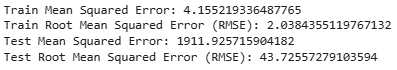

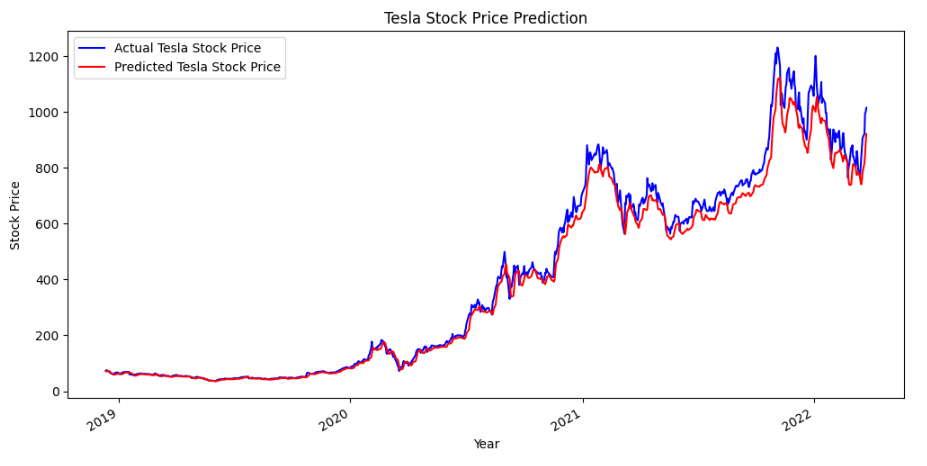

### LSTM prediction using both Tesla and Gold data


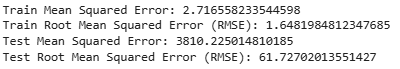

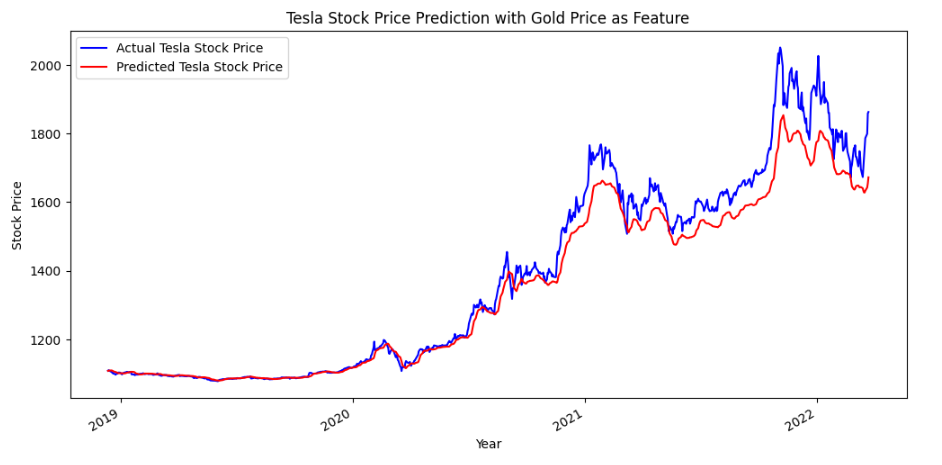

##Comments:

Firstly , we have only tesla data to train lstm model.First , i preprocess data using MinMaxScaler to scale values between 0 and 1.Then i split %70 of data for training and %30 for testing.I created a dataset for lstm model.Typically i used last 60 days to predict to next day's stock price.LSTM models expected data in shape(samples,time_steps,features). Thus i build my lstm model which is first unit:50 , then units:64 and denses 32,16,1 respectively.Optimizer is adam and loss function is mean square error. After that i trained my model epoch is 100 and batch size is 32. Then i did my predictions finally i evaluate my model using RMSE and i found **43** for RMSE in this problem.It can be better actually like 15 or less . So **43** mean here it can be think like mean **43$ **deflection for prices.Then i added my gold data and repeated same step except scaling data and model creating because model waiting extra input here for the training.Then model is trained again and other calculations , plots etc are shared above.And gold data added RMSE is around 60 , it mean its result is worse than only gold prices.

Here we can say increased complexity with additional feature can cause that actually.Adding a second feature (gold price) increases the complexity of the model. The model needs to process additional data and learn the relationships between Tesla's stock price and gold price. If the additional feature doesn't provide a strong predictive signal, the model may struggle to generalize and might overfit or underfit.



#Part 2:Transformer

##Code

In [29]:
df = pd.read_csv('tesla.csv', date_parser=True)

<ipython-input-29-7feb826dfbb5>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('tesla.csv', date_parser=True)


In [30]:
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [31]:
def create_dataset(dataset, time_step=60):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
# Parameters
time_step = 60
training_size = int(len(data_scaled) * 0.70)
test_size = len(data_scaled) - training_size
train_data, test_data = data_scaled[0:training_size,:], data_scaled[training_size:len(data_scaled),:]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [33]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [34]:
X_train.shape

(2008, 60, 1)

In [35]:
# Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

In [36]:
# Model Definition
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
x = GlobalAveragePooling1D(data_format='channels_first')(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 60, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 60, 1)     │          2 │ input_layer_2[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 1)     │      7,169 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 60, 1)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 60, 1)     │          0 │ dropout_1[0][0],  │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 1)     │          2 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 60, 4)     │          8 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 60, 4)     │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 60, 1)     │          5 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 60, 1)     │          0 │ dense_7[0][0],    │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 60)        │          0 │ add_1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 60)        │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 20)        │      1,220 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         21 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,427 (32.92 KB)

 Trainable params: 8,427 (32.92 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 301ms/step - loss: 4.9143e-04 - val_loss: 0.0060
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - loss: 7.5085e-05 - val_loss: 0.0048
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - loss: 3.8228e-05 - val_loss: 0.0034
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - loss: 2.3844e-05 - val_loss: 0.0036
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - loss: 2.2146e-05 - val_loss: 0.0039
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - loss: 1.9765e-05 - val_loss: 0.0041
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - loss: 1.9031e-05 - val_loss: 0.0037
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - loss: 1.5728e-05 - val_loss: 0.0039
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - loss: 1.8246e-05 - val_loss: 0.0034
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - loss: 1.4354e-05 - val_loss: 0.0039
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - loss: 1.5212e-05 - val_loss: 0.0

In [38]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Evaluate the model (Optional: Calculate RMSE or other metrics)
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Train RMSE: 40.52696116245646
Test RMSE: 706.2743548860926


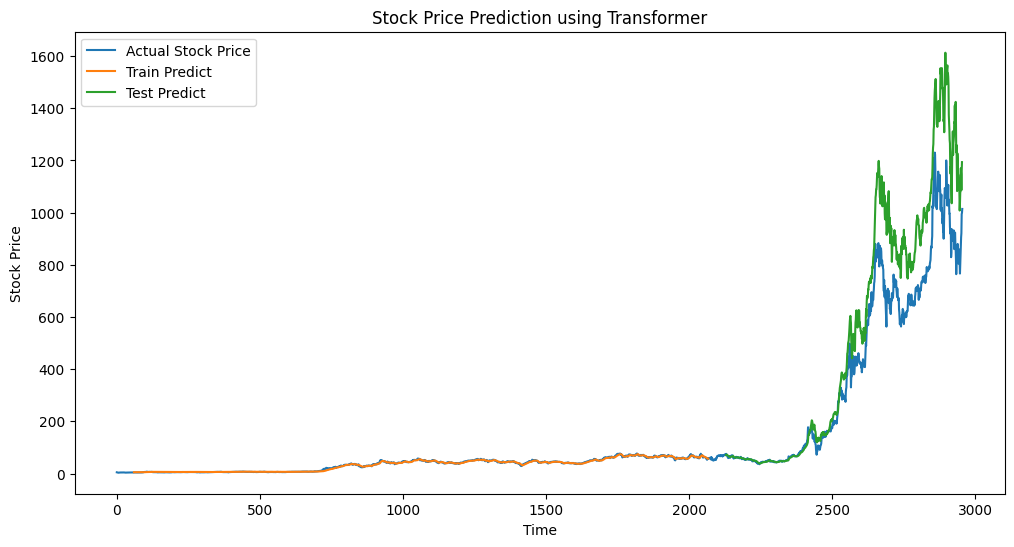

In [39]:
# Plotting the results
# Adjust the time_step offset for plotting
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(data_scaled)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_scaled), label='Actual Stock Price')
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title('Stock Price Prediction using Transformer')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [108]:
# Load Gold price data
gold_data = pd.read_csv('gold.csv', date_parser=True)
tesla_data = pd.read_csv('tesla.csv', date_parser=True)

<ipython-input-108-8a4224c3da20>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  gold_data = pd.read_csv('gold.csv', date_parser=True)
<ipython-input-108-8a4224c3da20>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  tesla_data = pd.read_csv('tesla.csv', date_parser=True)


In [109]:
# Merge both datasets on the 'Date' column
data = pd.merge(tesla_data[['Date', 'Close']], gold_data[['Date', 'Close']], on='Date', suffixes=('_tesla', '_gold'))
data.tail()


,Date,Close_tesla,Close_gold
2947,2022-03-17,871.599976,1942.0999755859375
2948,2022-03-18,905.390015,1928.199951171875
2949,2022-03-21,921.159973,1928.5999755859375
2950,2022-03-22,993.979980,1920.699951171875
2951,2022-03-23,999.109985,1936.5999755859375


In [110]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_tesla = scaler.fit_transform(data['Close_tesla'].values.reshape(-1, 1))
scaled_data_gold = scaler.fit_transform(data['Close_gold'].values.reshape(-1, 1))

In [111]:
# Combine the scaled data into a single dataset
scaled_data = np.hstack((scaled_data_tesla, scaled_data_gold))

In [112]:
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [113]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, :])  # Include both features (Tesla and Gold prices)
        y.append(data[i, 0])  # Predict Tesla stock price
    return np.array(X), np.array(y)


In [114]:
X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

In [115]:
# Model Definition
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=4, dropout=0.1)
x = GlobalAveragePooling1D(data_format='channels_first')(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 60, 2)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 2)     │          4 │ input_layer_5[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 2)     │     11,266 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 60, 2)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 60, 2)     │          0 │ dropout_13[0][0], │
│                     │                   │            │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 2)     │          4 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 60, 4)     │         12 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 60, 4)     │          0 │ dense_18[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 60, 2)     │         10 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 60, 2)     │          0 │ dense_19[0][0],   │
│                     │                   │            │ add_6[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 60)        │          0 │ add_7[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 60)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 20)        │      1,220 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 1)         │         21 │ dense_20[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,537 (48.97 KB)

 Trainable params: 12,537 (48.97 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
train_data.shape

(2066, 2)

In [117]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 0.0225
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - loss: 0.0048
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - loss: 0.0027
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - loss: 0.0013
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - loss: 0.0011
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - loss: 6.7951e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - loss: 6.1254e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - loss: 4.4216e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - loss: 4.2298e-04
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - loss: 3.2831e-04
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - loss: 3.2918e-04
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - loss: 3.1354e-04
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - loss: 3.1753e-04
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - loss: 2.9836e-04
Epoch 

In [135]:
X_train.shape[0],X_train.shape[1]

(2006, 60)

In [119]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Evaluate the model (Optional: Calculate RMSE or other metrics)
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Train RMSE: 1069.2456286499412
Test RMSE: 1084.7471247491947


In [136]:
train_predict.shape

(2006, 1)

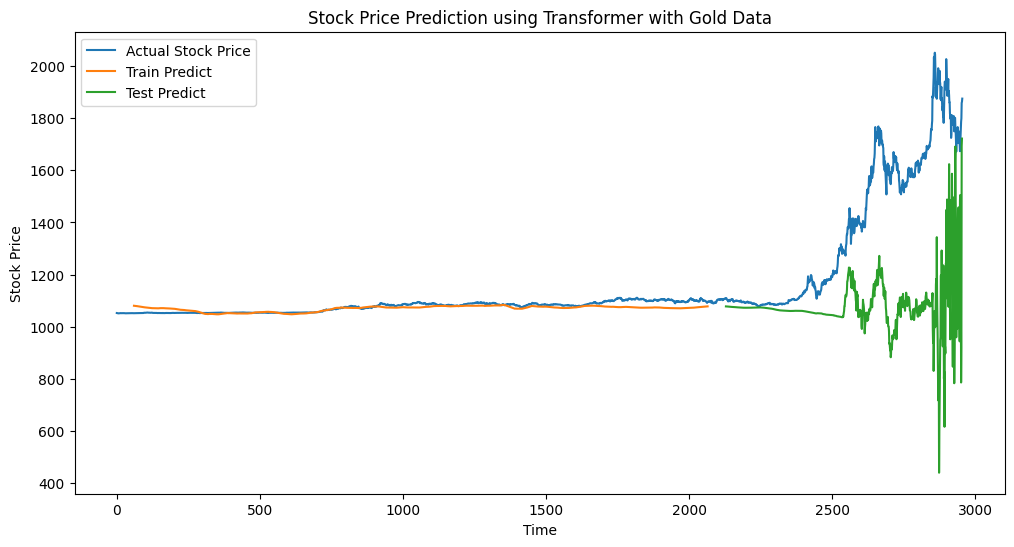

In [134]:
# Plotting the results
# Adjust the time_step offset for plotting
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict


# Shift test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+((time_step+1)*2)+1:len(data_scaled)-1, :] = test_predict
#Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_scaled), label='Actual Stock Price')
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title('Stock Price Prediction using Transformer with Gold Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


##Results:

### Transformer Model Prediction only Tesla Data

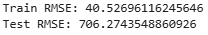

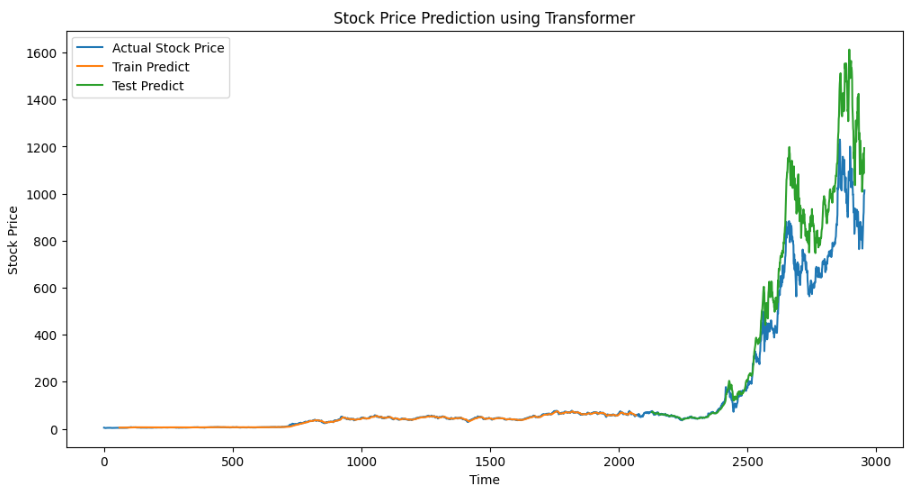

### Transformer Model Prediction both Gold and Tesla Data

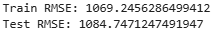

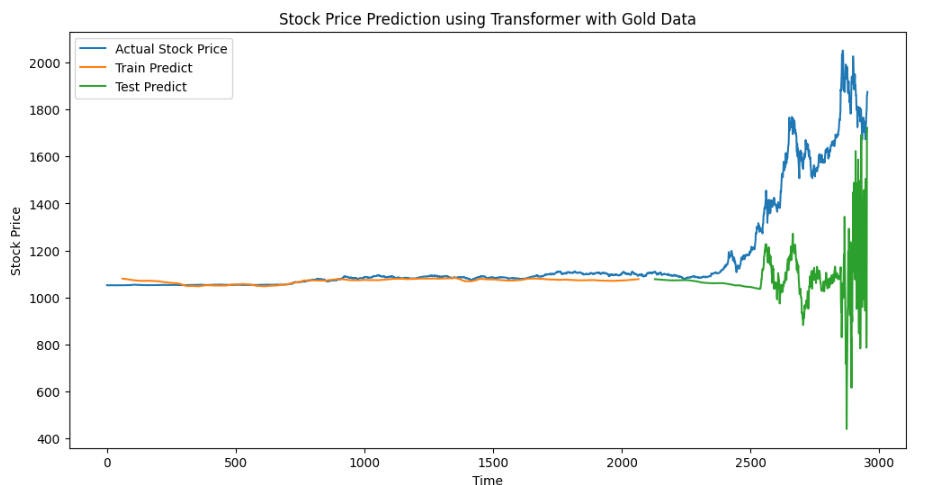

##Comments:

The Transformer architecture was built using custom components, specifically a transformer_encoder block consisting of:

- Layer Normalization

- Multi-Head Attention (with 4 heads and head size of 256)

- Feed-forward dense network with ReLU activation

- Dropout regularization (0.1)

The encoder also includes residual connections to aid gradient flow and prevent vanishing gradients during training. The output from the encoder is passed through a GlobalAveragePooling1D layer (using channels_first), followed by two dense layers with ReLU and linear activations respectively.

The model is compiled using the Adam optimizer and mean squared error (MSE) as the loss function.

After training the model, the following RMSE values were observed:

Train RMSE: 40.52

Test RMSE: 706.27

While the training RMSE is reasonable and comparable to the LSTM model, the test RMSE is extremely high, indicating poor generalization on unseen data.Hyperparameters such as head size, number of heads, and feed-forward dimensions may need tuning.

LSTM can be better for this purpose which predict TESLA prices.

Also , Transformer model using both data seems not correct it seems useless. It could be because of me maybe i did not do proper model for this case.

Train RMSE: 1069.2456286499412

Test RMSE: 1084.7471247491947

Its obvious model did not learn anything from both data to predict.